In [5]:
import pandas as pd

imdb = pd.read_csv('IMDb_Movies_India.csv', encoding='latin-1')


In [7]:
imdb.head(10)

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali
5,...Aur Pyaar Ho Gaya,(1997),147 min,"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor
6,...Yahaan,(2005),142 min,"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma
7,.in for Motion,(2008),59 min,Documentary,NaN,NaN,Anirban Datta,NaN,NaN,NaN
8,?: A Question Mark,(2012),82 min,"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia
9,@Andheri,(2014),116 min,"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon


In [15]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [19]:
imdb.isna().sum()

Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [21]:
nulls = imdb[imdb.iloc[:, 1:9].isna().all(axis=1)]
nulls.count()

Name        8
Year        0
Duration    0
Genre       0
Rating      0
Votes       0
Director    0
Actor 1     0
Actor 2     0
Actor 3     0
dtype: int64

In [27]:
imdb.dropna(subset=imdb.columns[1:9], how='all', inplace=True)


In [29]:
imdb.drop_duplicates(subset=['Name', 'Year'], keep='first', inplace=True)


In [37]:
# Remove rows with missing values in columns 1, 2, 4, and 5 (excluding 'Genre')
imdb.dropna(subset=imdb.columns[[1,2,4,5]], how='all', inplace=True)

In [41]:
# Clean 'Year' and 'Duration' columns
imdb['Year'] = imdb['Year'].str.replace(r'[()]', '', regex=True)
imdb['Duration'] = imdb['Duration'].str.replace(r' min', '', regex=True)


In [59]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 15083 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15083 non-null  object 
 1   Year      14958 non-null  object 
 2   Duration  7235 non-null   float64
 3   Genre     13244 non-null  object 
 4   Rating    7915 non-null   float64
 5   Votes     7915 non-null   float64
 6   Director  14587 non-null  object 
 7   Actor 1   13584 non-null  object 
 8   Actor 2   12863 non-null  object 
 9   Actor 3   12148 non-null  object 
dtypes: float64(3), object(7)
memory usage: 1.3+ MB


In [47]:
genres=imdb['Genre'].str.split(',',expand=True)
genres.head(5)


,0,1,2
1,Drama,None,None
2,Drama,Musical,None
3,Comedy,Romance,None
4,Drama,None,None
5,Comedy,Drama,Musical


In [53]:
imdb['Votes'] = imdb['Votes'].str.replace(',', '')
imdb['Votes'] = pd.to_numeric(imdb['Votes'], errors='coerce')

In [57]:
imdb['Duration'] = pd.to_numeric(imdb['Duration'], errors='coerce')


In [61]:
imdb['Year'] = pd.to_numeric(imdb['Year'], errors='coerce')


In [63]:
imdb.dropna(subset=['Rating'], inplace=True)


In [65]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7915 non-null   object 
 1   Year      7915 non-null   float64
 2   Duration  5849 non-null   float64
 3   Genre     7814 non-null   object 
 4   Rating    7915 non-null   float64
 5   Votes     7915 non-null   float64
 6   Director  7910 non-null   object 
 7   Actor 1   7790 non-null   object 
 8   Actor 2   7715 non-null   object 
 9   Actor 3   7624 non-null   object 
dtypes: float64(4), object(6)
memory usage: 680.2+ KB


In [71]:
#using forward fill for duration
imdb['Duration'].fillna(method='ffill', inplace=True)


C:\Users\iamit\AppData\Local\Temp\ipykernel_9712\2068301744.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  imdb['Duration'].fillna(method='ffill', inplace=True)


In [75]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7915 non-null   object 
 1   Year      7915 non-null   float64
 2   Duration  7915 non-null   float64
 3   Genre     7814 non-null   object 
 4   Rating    7915 non-null   float64
 5   Votes     7915 non-null   float64
 6   Director  7910 non-null   object 
 7   Actor 1   7790 non-null   object 
 8   Actor 2   7715 non-null   object 
 9   Actor 3   7624 non-null   object 
dtypes: float64(4), object(6)
memory usage: 680.2+ KB


In [77]:
# Randomly sample non-missing values for 'Director', 'Actor 1', 'Actor 2', 'Actor 3'
# Get the non-missing values
non_missing_directors = imdb['Director'].dropna()
non_missing_actor1 = imdb['Actor 1'].dropna()
non_missing_actor2 = imdb['Actor 2'].dropna()
non_missing_actor3 = imdb['Actor 3'].dropna()

In [81]:
import numpy as np

# Randomly sample from non-missing values to fill missing values
imdb['Director'] = imdb['Director'].apply(lambda x: np.random.choice(non_missing_directors) if pd.isnull(x) else x)
imdb['Actor 1'] = imdb['Actor 1'].apply(lambda x: np.random.choice(non_missing_actor1) if pd.isnull(x) else x)
imdb['Actor 2'] = imdb['Actor 2'].apply(lambda x: np.random.choice(non_missing_actor2) if pd.isnull(x) else x)
imdb['Actor 3'] = imdb['Actor 3'].apply(lambda x: np.random.choice(non_missing_actor3) if pd.isnull(x) else x)

In [87]:
imdb.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7915 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      7915 non-null   object 
 1   Year      7915 non-null   float64
 2   Duration  7915 non-null   float64
 3   Genre     7915 non-null   object 
 4   Rating    7915 non-null   float64
 5   Votes     7915 non-null   float64
 6   Director  7915 non-null   object 
 7   Actor 1   7915 non-null   object 
 8   Actor 2   7915 non-null   object 
 9   Actor 3   7915 non-null   object 
dtypes: float64(4), object(6)
memory usage: 680.2+ KB


In [85]:
imdb['Genre'].fillna(imdb['Genre'].mode()[0], inplace=True)


In [91]:
#Top 10 rated movies
top_10_movies = imdb.loc[imdb['Rating'].sort_values(ascending=False)[:10].index]
top_10_movies

,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
8339,Love Qubool Hai,2020.0,94.0,"Drama, Romance",10.0,5.0,Saif Ali Sayeed,Ahaan Jha,Mahesh Narayan,Rajasree Rajakumari
5410,Half Songs,2021.0,79.0,"Music, Romance",9.7,7.0,Sriram Raja,Raj Banerjee,Emon Chatterjee,Purshottam Mulani
2563,Breed,2020.0,82.0,Drama,9.6,48.0,Bobby Kumar,Bobby Kumar,Ashfaq,Fasih Choudhry
11704,Ram-Path,2017.0,150.0,Documentary,9.4,5.0,Ashish Dubey,Ishan Jacob,Aparajita,Ahindra Choudhury
5077,Gho Gho Rani,2019.0,105.0,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar
6852,June,2021.0,93.0,Drama,9.4,18.0,Suhrud Godbole,Vaibhav Khisti,Nilesh Divekar,Jitendra Joshi
14222,The Reluctant Crime,2020.0,113.0,Drama,9.4,16.0,Arvind Pratap,Dharmendra Ahir,Awanish Kotnal,Rakhi Mansha
12673,Secrets of Sinauli,2021.0,56.0,"Documentary, History",9.3,1373.0,Raghav Jairath,Manoj Bajpayee,R.S. Bhist,K.N. Dixit
1729,Baikunth,2021.0,72.0,Family,9.3,29.0,Vishwa Bhanu,Vishwa Bhanu,Sangam Shukla,Vijay Thakur
8344,Love Sorries,2021.0,101.0,"Comedy, Drama, Romance",9.3,79.0,Gautam Joshi,Prashant Chaubey,Puneet Chouksey,Amitabh Gupta


In [93]:
#Top rated movies of each  year
imdb.groupby('Year').apply(pd.DataFrame.nlargest, n=1, columns=['Rating'])


,,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
Year,,,,,,,,,,,
1917.0,8146,Lanka Dahan,1917.0,107.0,"Adventure, Drama, Fantasy",6.7,22.0,Dhundiraj Govind Phalke,Anna Salunke,Ganpat G. Shinde,D.D. Dabke
1931.0,7203,Kalidas,1931.0,143.0,"Drama, History, Musical",6.2,12.0,H.M. Reddy,T.P. Rajalakshmi,P.G. Venkatesan,L.V. Prasad
1932.0,2183,Bharati Mata,1932.0,170.0,Drama,6.1,12.0,Pesi Karani,Hadi,Jamshedji,Jillo
1933.0,851,Alif Laila,1933.0,120.0,Fantasy,7.2,37.0,Balwant Bhatt,Shanti Dave,Bashir Qawal,Zohra
1934.0,9053,Mazdoor,1934.0,155.0,Drama,8.5,6.0,Mohan Dayaram Bhavnani,Bibbo,S.B. Nayampalli,Paidi Jairaj
...,...,...,...,...,...,...,...,...,...,...,...
2017.0,11704,Ram-Path,2017.0,150.0,Documentary,9.4,5.0,Ashish Dubey,Ishan Jacob,Aparajita,Ahindra Choudhury
2018.0,1314,Ashok Vatika,2018.0,97.0,Drama,9.3,7.0,Rahul Mallick,Kunj Anand,Sanjay Bishnoi,Paras Zutshi
2019.0,5077,Gho Gho Rani,2019.0,105.0,"History, Romance",9.4,47.0,Munni Pankaj,Nishi Neha Mishra,Pankaj Kamal,Akash Kumar


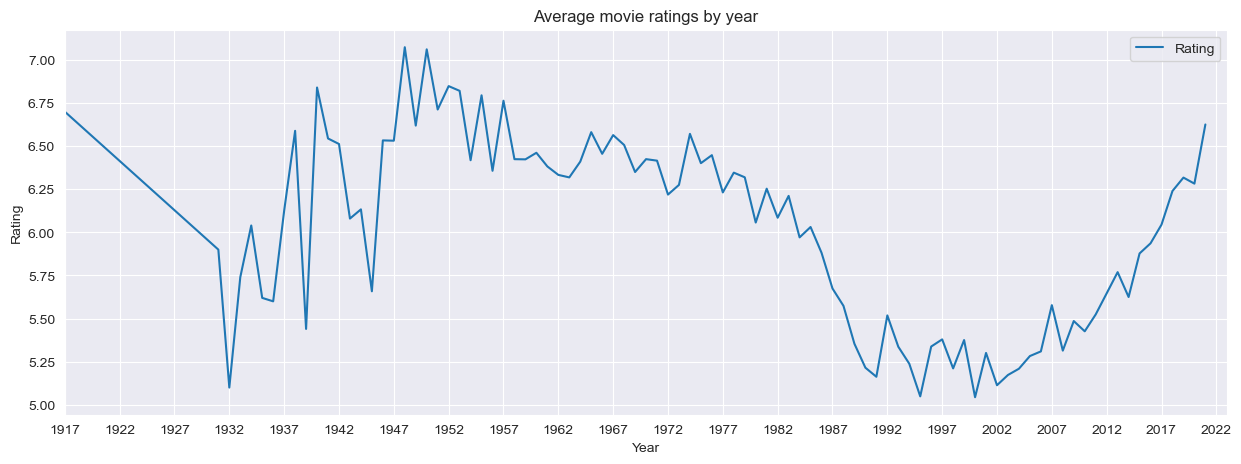

In [97]:
#Below graph shows average rating for every year and according to it the year with best ratings should be 1948 and worst is 2002
import matplotlib.pyplot as plt
import seaborn as sns 

sns.set_style('darkgrid')
imdb.groupby('Year')[['Rating']].mean().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Rating')
plt.title('Average movie ratings by year')
plt.xticks(np.arange(1917,2023,5))
plt.xlim(1917,2023)
plt.show()



C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating

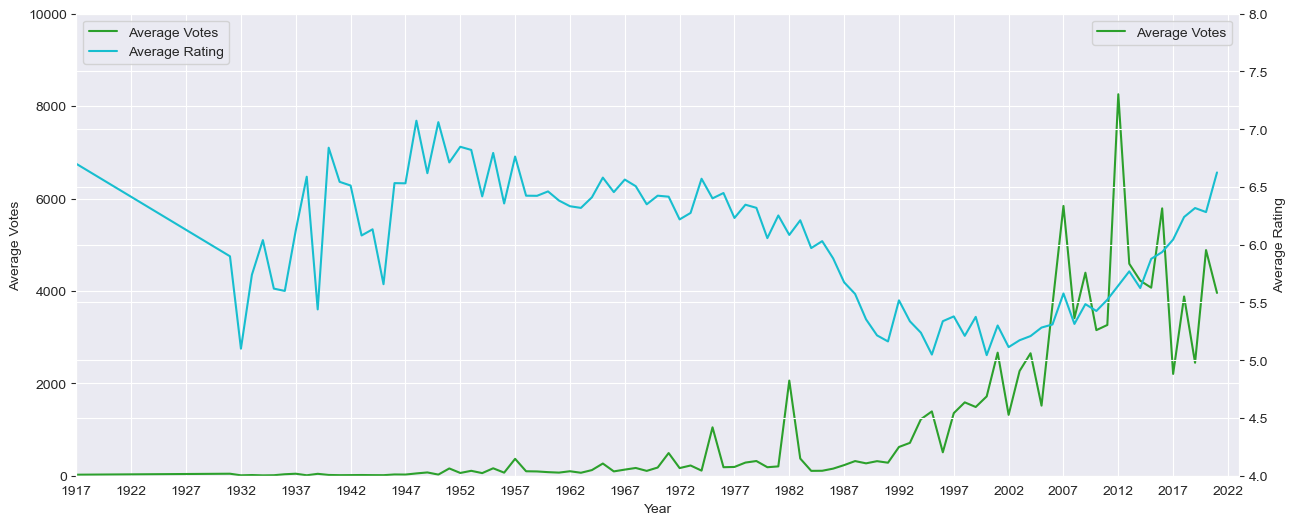

In [105]:
#average votes vs year
#average ratings vs year
fig,ax1 = plt.subplots(figsize=(15,6))
sns.lineplot(data=imdb,x='Year',y='Votes',errorbar=None,ax=ax1,label='Average Votes',color='#2ca02c')
ax1.set_xlabel('Year')
ax1.set_ylabel('Average Votes')
ax1.set_xlim(1917,2023)
ax1.set_ylim(0,10000)
ax1.set_xticks(np.arange(1917,2023,5))
ax2 = ax1.twinx()
sns.lineplot(data=imdb,x='Year',y='Rating',errorbar=None,ax=ax2,color='#17becf',label='Average Rating')
ax2.set_ylabel('Average Rating')
ax2.set_ylim(4,8)
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left')
plt.show()

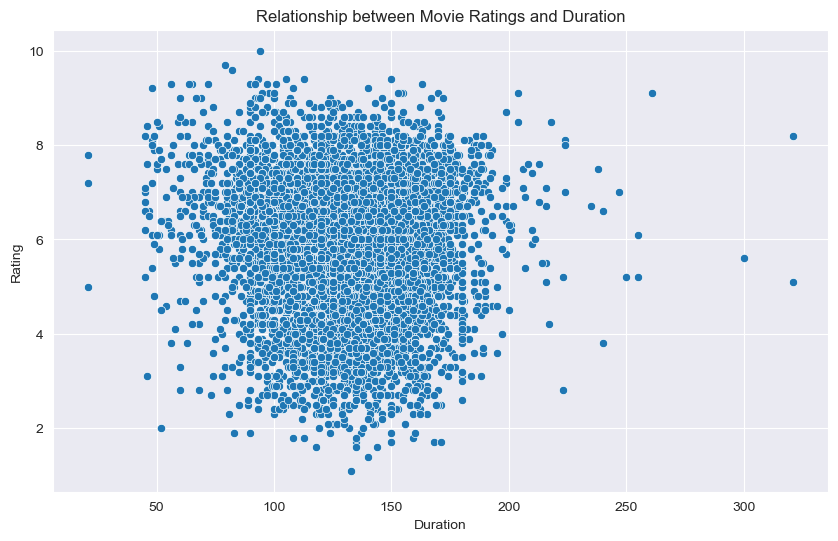

In [107]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Duration', y='Rating', data=imdb)
plt.title('Relationship between Movie Ratings and Duration')
plt.xlabel('Duration')
plt.ylabel('Rating')
plt.show()

In [109]:
#Most of the movies duration lie between 50 min to 200 min
#And highest rated movie is of 90 min duration


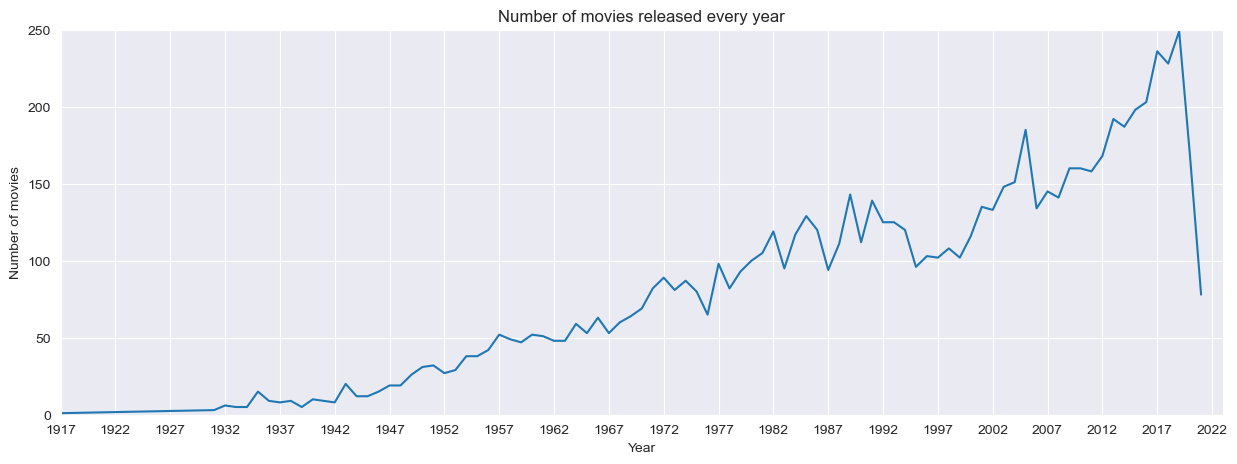

In [111]:
sns.set_style('darkgrid')
imdb.groupby(['Year'])['Name'].count().plot(figsize=(15,5))
plt.xlabel('Year')
plt.ylabel('Number of movies')
plt.title('Number of movies released every year')
plt.ylim(0,250)
plt.xlim(1917,2023)
plt.xticks(np.arange(1917,2023,5))
plt.show()

C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\iamit\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


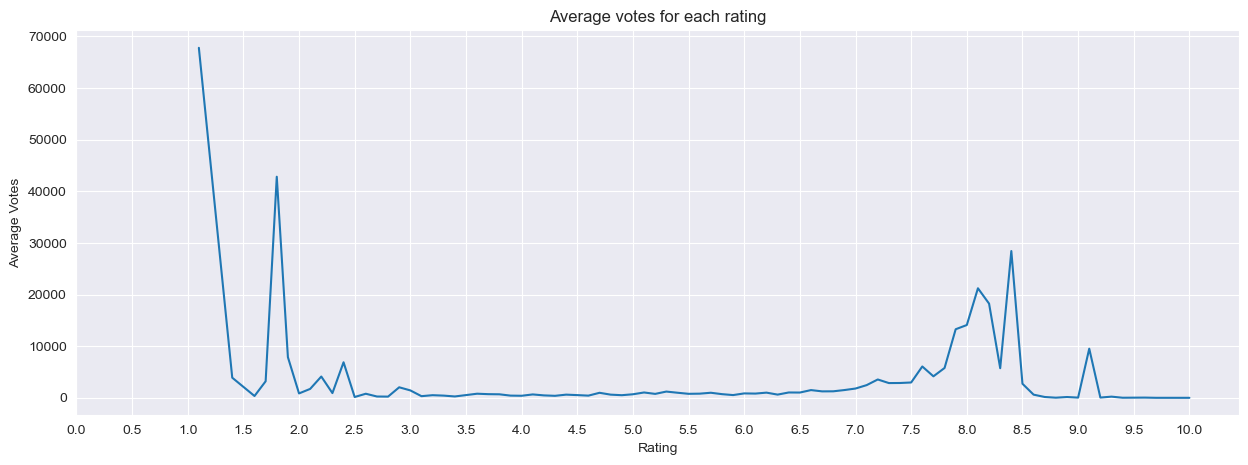

In [113]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.lineplot(data=imdb,x='Rating',y='Votes',errorbar=None)
plt.xlabel('Rating')
plt.ylabel('Average Votes')
plt.xticks(np.arange(0,10.5,0.5))
plt.title('Average votes for each rating')
plt.show()

In [115]:
#Above graph shows us the average vots for each rating and we can see the movies rated 9.5-10 may drop in rating as the votes 
#increase or they may retain their rating depends on your vote

In [117]:
directors  = imdb.groupby('Director').agg({'Rating':['mean','count']})
directors.columns = directors.columns.droplevel(0)
directors.reset_index(inplace=True)
directors.columns = ['Director','Average Rating','Movie count']
directors['Average Rating'] = directors['Average Rating'].round(1)
directors.sort_values(by='Movie count',ascending=False,inplace=True)
directors.head()

,Director,Average Rating,Movie count
1422,Mahesh Bhatt,5.4,47
629,David Dhawan,5.2,43
962,Hrishikesh Mukherjee,7.1,42
2562,Shakti Samanta,6.6,39
1233,Kanti Shah,5.0,38


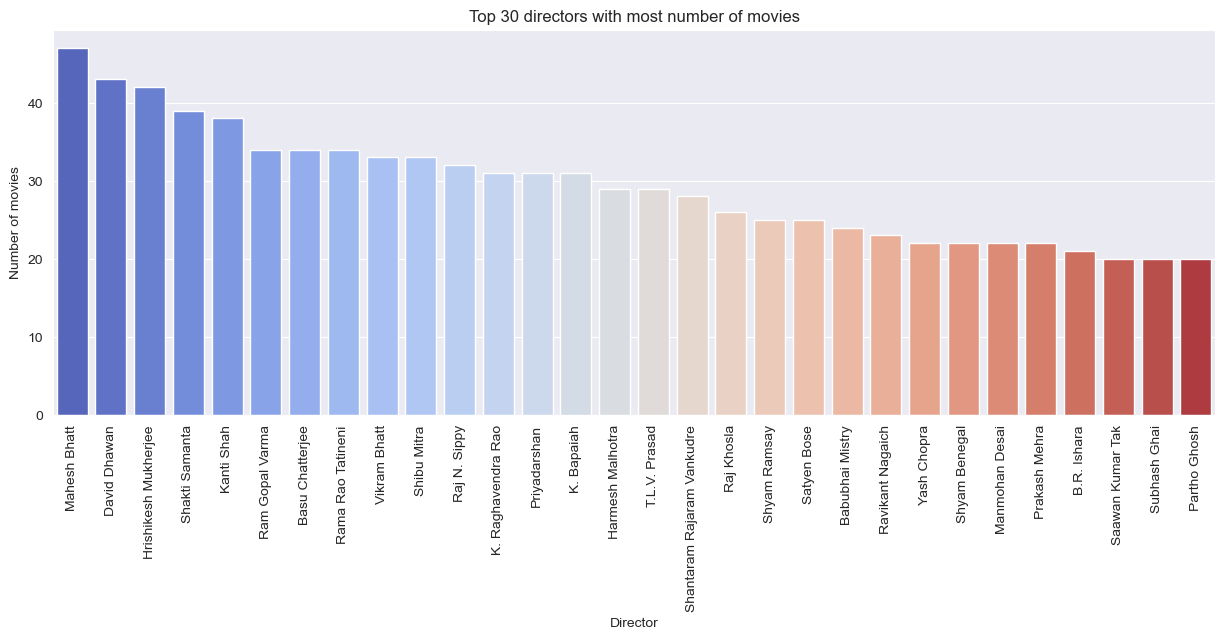

In [119]:
directors_dict = dict(zip(directors['Director'],directors['Average Rating']))

plt.figure(figsize=(15,5))
sns.set_style('darkgrid')
sns.barplot(data=directors.head(30),x='Director',y='Movie count',palette='coolwarm')
plt.xlabel('Director')
plt.ylabel('Number of movies')
plt.xticks(rotation=90)
plt.title('Top 30 directors with most number of movies')
plt.show()

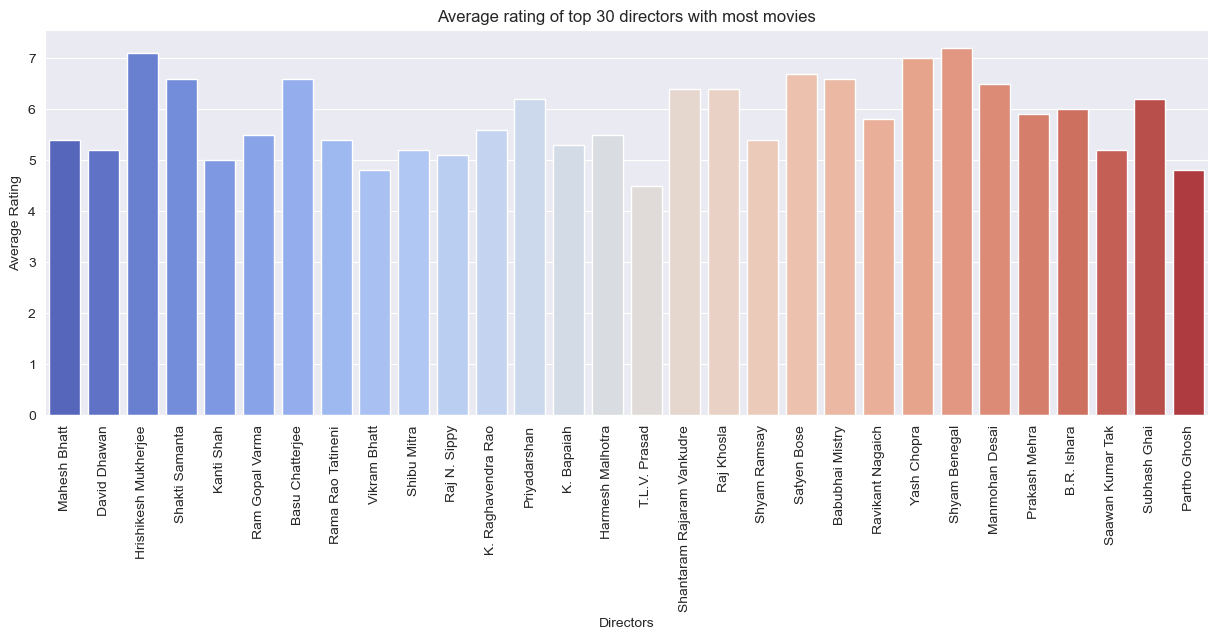

In [121]:
sns.set_style('darkgrid')
plt.figure(figsize=(15,5))
sns.barplot(data=directors.head(30),x='Director',y='Average Rating',palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Directors')
plt.ylabel('Average Rating')
plt.title('Average rating of top 30 directors with most movies')
plt.show()

In [123]:
imdb_melted = imdb.melt(id_vars='Rating', value_name='actor', var_name='role', value_vars=['Actor 1', 'Actor 2', 'Actor 3'])
actor_scores = imdb_melted.groupby('actor')['Rating'].agg(['mean', 'count'])
actor_scores.reset_index(inplace=True)
actor_scores.columns = ['Actor','Average Score', 'Number of movies']
actor_scores.sort_values('Number of movies', ascending=False, inplace=True)
actor_scores['Average Score']=actor_scores['Average Score'].round(1)
actor_scores

,Actor,Average Score,Number of movies
3094,Mithun Chakraborty,5.4,235
1441,Dharmendra,5.8,221
2164,Jeetendra,5.4,182
844,Ashok Kumar,6.4,179
440,Amitabh Bachchan,6.2,166
...,...,...,...
2451,Keshto Iqbal,4.0,1
2448,Kelli Garner,6.0,1
2447,Keeya Khanna,3.8,1
2446,Kedar Kapoor,6.1,1


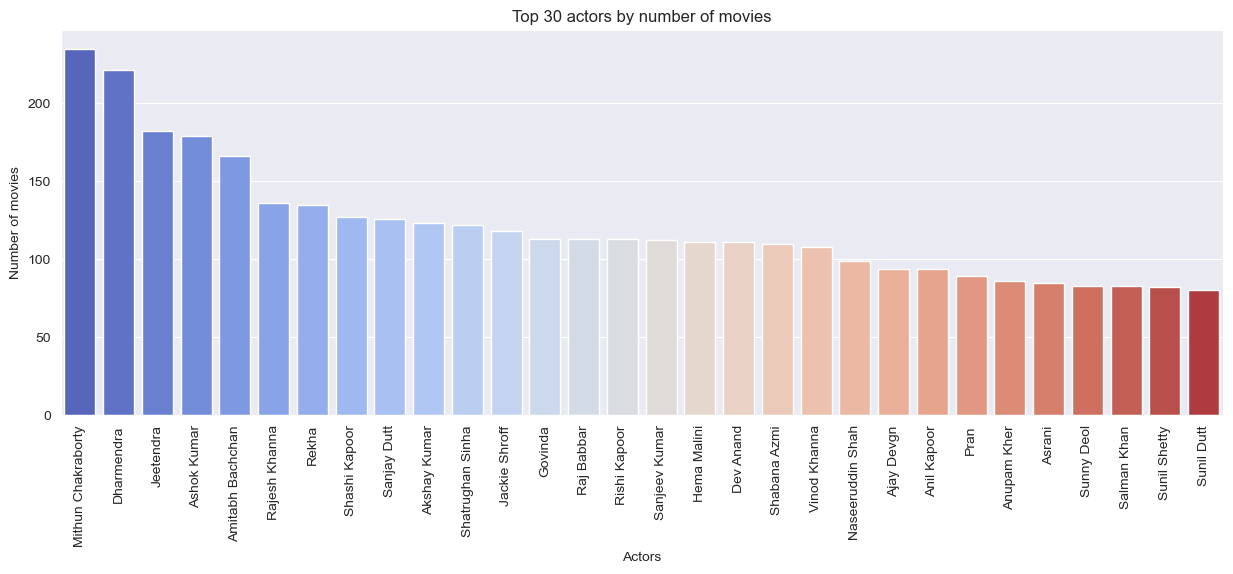

In [125]:
actor_score_dict = dict(zip(actor_scores['Actor'], actor_scores['Average Score']))
plt.figure(figsize=(15,5))
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=False,palette='coolwarm')
plt.xticks(rotation=90)
plt.xlabel('Actors')
plt.ylabel('Number of movies')
plt.title('Top 30 actors by number of movies')
plt.show()

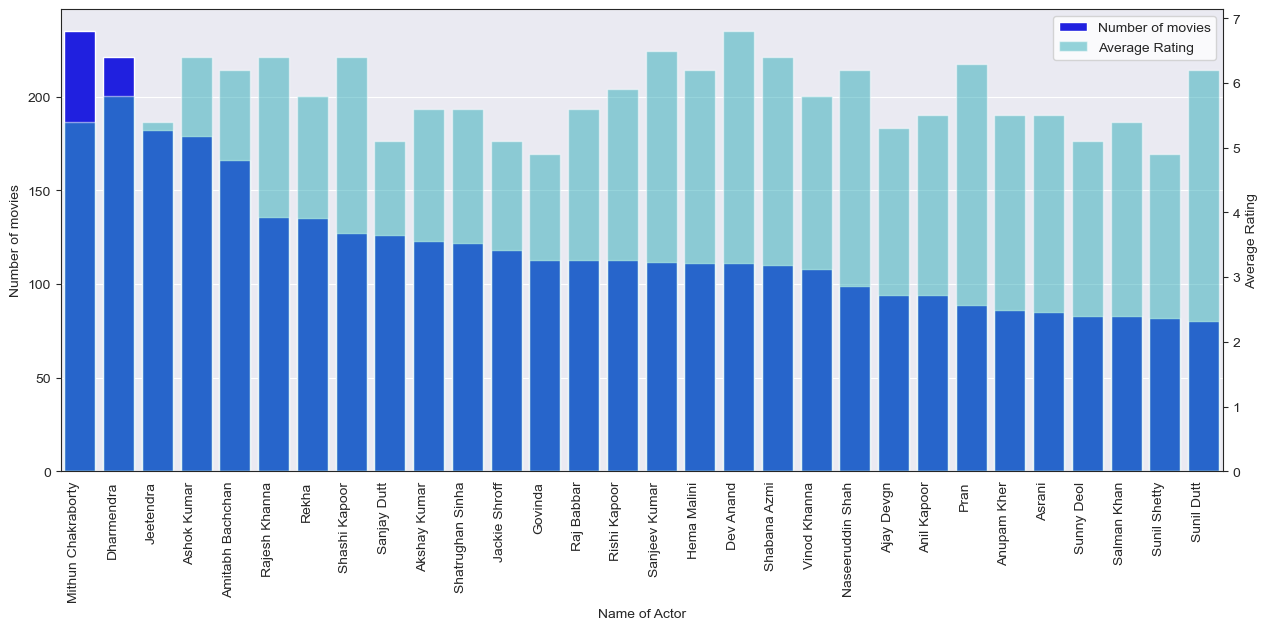

In [127]:
#along with average rating

fig,ax1 = plt.subplots(figsize=(15,6))
sns.set_style('white')
sns.barplot(data=actor_scores[:30],x='Actor',y='Number of movies',dodge=True,ax=ax1,label='Number of movies',color='blue')
ax1.set(xlabel='Name of Actor', ylabel='Number of movies')
ax1.set_xticklabels(ax1.get_xticklabels(), rotation=90, ha='right')
ax2 = ax1.twinx()
sns.barplot(data=actor_scores[:30],x='Actor',y='Average Score',dodge=True,ax=ax2,color='#17becf',label='Average Rating',alpha=0.5)
ax2.set_ylabel('Average Rating')
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper right')
plt.show()

In [129]:
# Grouping the columns with their average rating and then creating a new feature

genre_mean_rating = imdb.groupby('Genre')['Rating'].transform('mean')
imdb['Genre_mean_rating'] = genre_mean_rating

director_mean_rating = imdb.groupby('Director')['Rating'].transform('mean')
imdb['Director_encoded'] = director_mean_rating

actor1_mean_rating = imdb.groupby('Actor 1')['Rating'].transform('mean')
imdb['Actor1_encoded'] = actor1_mean_rating

actor2_mean_rating = imdb.groupby('Actor 2')['Rating'].transform('mean')
imdb['Actor2_encoded'] = actor2_mean_rating

actor3_mean_rating = imdb.groupby('Actor 3')['Rating'].transform('mean')
imdb['Actor3_encoded'] = actor3_mean_rating

In [131]:
# Keeping the predictor and target variable

X = imdb[[ 'Year', 'Votes', 'Duration', 'Genre_mean_rating','Director_encoded','Actor1_encoded', 'Actor2_encoded', 'Actor3_encoded']]
y = imdb['Rating']

In [135]:
# Splitting the dataset into training and testing parts

from sklearn.model_selection import train_test_split, cross_val_score

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [167]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score as score
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

def evaluate_model(y_true, y_pred, model_name):
    print("Model: ", model_name)
    print("Accuracy = {:0.2f}%".format(score(y_true, y_pred)*100))
    print("Mean Squared Error = {:0.2f}\n".format(mean_squared_error(y_true, y_pred, squared=False)))
    return round(score(y_true, y_pred)*100, 2)

In [171]:
# Building 5 machine learning models and training them

LR = LinearRegression()
LR.fit(X_train, y_train)
lr_preds = LR.predict(X_test)

RFR = RandomForestRegressor(n_estimators=100, random_state=1)
RFR.fit(X_train, y_train)
rf_preds = RFR.predict(X_test)

DTR = DecisionTreeRegressor(random_state=1)
DTR.fit(X_train, y_train)
dt_preds = DTR.predict(X_test)

GBR = GradientBoostingRegressor(n_estimators=100, random_state=60)
GBR.fit(X_train, y_train)
gb_preds = GBR.predict(X_test)

KNR = KNeighborsRegressor(n_neighbors=5)
KNR.fit(X_train, y_train)
knn_preds = KNR.predict(X_test)


In [173]:
LRScore = evaluate_model(y_test, lr_preds, "LINEAR REGRESSION")
RFScore = evaluate_model(y_test, rf_preds, "RANDOM FOREST")
DTScore = evaluate_model(y_test, dt_preds, "DECEISION TREE")
GBScore = evaluate_model(y_test, gb_preds, "GRADIENT BOOSTING")
KNNScore = evaluate_model(y_test, knn_preds, "K NEAREST NEIGHBORS")

Model:  LINEAR REGRESSION
Accuracy = 73.10%
Mean Squared Error = 0.70

Model:  RANDOM FOREST
Accuracy = 78.52%
Mean Squared Error = 0.62

Model:  DECEISION TREE
Accuracy = 56.93%
Mean Squared Error = 0.88

Model:  GRADIENT BOOSTING
Accuracy = 77.89%
Mean Squared Error = 0.63

Model:  K NEAREST NEIGHBORS
Accuracy = 26.12%
Mean Squared Error = 1.16



In [177]:
models = pd.DataFrame(
    {
        "MODELS": ["Linear Regression", "Random Forest", "Decision Tree", "Gradient Boosting", "K Nearest Neighbors"],
        "SCORES": [LRScore, RFScore, DTScore, GBScore, KNNScore]
    }
)
models.sort_values(by='SCORES', ascending=False)

,MODELS,SCORES
1,Random Forest,78.52
3,Gradient Boosting,77.89
0,Linear Regression,73.10
2,Decision Tree,56.93
4,K Nearest Neighbors,26.12


In [179]:
X.head()

,Year,Votes,Duration,Genre_mean_rating,Director_encoded,Actor1_encoded,Actor2_encoded,Actor3_encoded
1,2019.0,8.0,109.0,6.323944,7.000000,6.850000,7.000000,7.000000
3,2019.0,35.0,110.0,5.722500,4.400000,5.420000,4.400000,4.450000
5,1997.0,827.0,147.0,6.224490,5.358824,4.788889,5.786667,5.846154
6,2005.0,1086.0,142.0,6.820000,7.500000,5.350000,6.050000,6.500000
8,2012.0,326.0,82.0,5.463636,5.600000,5.600000,5.883333,5.600000


In [181]:
y.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64

In [183]:
#creating a new row for crosschecking with values closer to 1527th row

data = {'Year': [2005], 'Votes': [1085], 'Duration': [142], 'Genre_mean_rating': [6.8], 'Director_encoded': [7.5], 'Actor1_encoded': [5.3], 'Actor2_encoded': [6], 'Actor3_encoded': [5.5]}
df = pd.DataFrame(data)

# Predict the movie rating
predicted_rating = rf.predict(df)

print("Predicted Rating:", predicted_rating[0])

Predicted Rating: 6.940000000000001
